In [1]:
"""
An implementation for HW2.
This is source code for logistic regression for optimal performance.
This uses Logistic regression method with cross entrophy with GD for optimization.
By 32190984 Isu Kim  @ github.com/gooday2die
"""

'\nAn implementation for HW2.\nThis is source code for logistic regression for optimal performance.\nThis uses Logistic regression method with cross entrophy with GD for optimization.\nBy 32190984 Isu Kim  @ github.com/gooday2die\n'

In [2]:
import pandas as pd
import numpy as np

In [3]:
def sigmoid(x):
    """
    A function that implements sigmoid function.
    This will calculate sigmoid function with value of x.
    
    @param x: The x value to calculate sigmoid function.
    @return: The calculated value in float.
    """
    return 1 / (1 + np.exp(-x))

In [4]:
def equation(x, theta):
    return theta[0] * x[0] + theta[1] * (x[1] ** 5) + theta[2] * ((x[1] ** 4) * x[2]) + theta[3] * ((x[1] ** 3) * (x[2] ** 2)) + theta[4] * ((x[1] ** 2) * (x[2] ** 3)) + theta[5] * ((x[1] ** 1) * (x[2] ** 4)) + theta[6] * (x[2] ** 5)

In [5]:
def hypothesis(x, theta):
    """
    A function that is for hypothesis which is our model h_\theta(x)
    This will calculate sigmoid function with linear function as exponent.
    
    Both parameters must be in 1D flattened list object.
    @param x: The list object containing pair of [x_1 and x_2]
    @param theta: The list object containing tuple of [\theta_0, \theta_1, \theta_2]
    @return: The calculated value.    
    """
    return sigmoid(equation(x, theta))

In [7]:
def get_gradient(x, y, theta, j):
    """
    A function that is for calculating gradient of specific j.

    @param x: All data containing x values. 
              This shall be in N * 3 dimension.
    @param y: All data containing y values.
              This shall be in N * 1 dimension.
    @param theta: All theta values.
              This shall be in N * 1 dimension.
    @param j: The specific j to get gradient from.
              For example, if we are about to update \theta_1, use j as 1.
              This function will calculate gradient of the cost graph with j = 1.
    @return: The calculate gradient value for specific j.
    """
    tmp = 0
    for i in range(len(x)):
        predict = hypothesis(x[i], theta)
        mul = 0
        if (j == 0):
            mul = 1
        elif (j == 1):
            mul = x[i][1] ** 5
        elif (j == 2):
            mul = (x[i][1] ** 4) * (x[i][2] ** 1)
        elif (j == 3):
            mul = (x[i][1] ** 3) * (x[i][2] ** 2)
        elif (j == 4):
            mul = (x[i][1] ** 2) * (x[i][2] ** 3)
        elif (j == 5):
            mul = (x[i][1] ** 1) * (x[i][2] ** 4)
        elif (j == 6):
            mul = x[i][2] ** 5
        tmp = tmp + (predict - y[i]) * mul
    return tmp / len(x)

In [14]:
def do_gradient_descent(max_iter, learning_rate, data_x, data_y, round_point):
    """
    A function that does gradient descent.
    This will use logistic regression with cost using cross entropy.
    
    Please refer to documentation for more information about implementation.
    
    @param max_iter: The maximum iteration count for training. Use iterations like 1000000.
    @param learning_rate: The learning rate for gradient descent.
                          Use learning rate which is not too small, don't use values like 0.01.
                          That will take so much time.
    @param data_x: The x data.
    @param data_y: The y data.
    @param round_point: The point that the weights are rounded.
                        If not rounded, this might go up to lots of iterations.
    @return list object that contains (a, b)
    """
    theta = [0] * 7  # Intial value for \thetas.
    x = [(1, data_x["x1"][i], data_x["x2"][i]) for i in range(len(data_x))]  # Store 1, x_1, x_2)
    y = list(data_y)
    
    before_theta = list()
    
    for i in range(max_iter):  # Iterate for max_iter count
        if i % 100 == 0:  # In every 1000 iterations, print \theta. just for outputs.
            print("[+] Iter : " + str(i) + " / Theta : " + str(theta))

        before_theta = theta
        tmp_theta = [0] * 7  # Store tmp \theta values.
    
        for j in range(7):  # Update \theta_0 to \theta_3
            gradient = get_gradient(x, y, theta, j)  # Calculate gradient
            tmp_theta[j] = theta[j] - learning_rate * gradient  # Apply GD.

        theta = tmp_theta  # Update \thetas simultaneously.        

        # Check if convergence happened. If so, stop training.
        if ([round(x, round_point) for x in before_theta] == [round(x, round_point) for x in theta]):
        #if before_theta == theta:
            print("Convergence!!! Stop training.")
            print("[+] Iter : " + str(i) + " / Theta : " + str(theta))
            break
        
    return theta

In [15]:
def predict(x, theta):
    """
    A function that predicts data using theta value
    @param x: The x value in [X_0, X_1, X_2] format.
    @param theta: The theta values to use.
    @return: Predicted label
    """
    if equation(x, theta) >= 0:
        return 1
    else:
        return 0

In [16]:
def calculate_accr(x_in, y_in, theta):
    """
    A function that calculates accuracy with \theta
    The accuracy is calculated by
    (total correct predictions) / (data count)
    
    @param x_in: The x value in [X_1, X_2] format
    @param y_in: The y values
    @param theta: The theta values in [theta_0, theta_1, theta_2] format
    @return Accuracy.
    """
    x = [(1, x_in["x1"][i], x_in["x2"][i]) for i in range(len(y_in))]  # Store (1, x_1, x_2)
    y = list(y_in)  # Store y values.

    correct = 0
    for i in range(len(x)):  # Iterate and check if predict matches real data.
        predicted = predict(x[i], theta)
        if predicted == y[i]:
            correct += 1  # If so, add one to correct.
    print("[+] " + str(correct) + "/" + str(len(x)))
    return correct / len(x)  # Divide all corrects by all data.

In [17]:
def calculate_cost(x_in, y_in, theta):
    """
    A function that calculates cost of with \theta.
    The cost is calculated by
    
    -1/m sum i from 1 to m (y_i * ln(h_\theta(x_i)) + (1 - y_i) * ln(1 - h_\theta(x_i)))
    
    @param x_in: The x value in [X_1, X_2] format
    @param y_in: The y values
    @param theta: The theta values in [theta_0, theta_1, theta_2] format
    @return Cost.
    """
    x = [(1, x_in["x1"][i], x_in["x2"][i]) for i in range(len(y_in))]  # Store (1, x_1, x_2)
    y = list(y_in)  # Store y values.
    
    total = 0
    for i in range(len(y)):
        # Iterate and calculate (y_i * ln(h_\theta(x_i)) + (1 - y_i) * ln(1 - h_\theta(x_i))
        total += ((y[i] * np.log(hypothesis(x[i], theta))) + (1 - y[i]) * np.log(1 - hypothesis(x[i], theta)))
    
    return -1 * total / len(y)

In [18]:
df_train = pd.read_csv("../hw2_train.csv")  # Read csv file.
data_x = df_train[["x1", "x2"]]  # Select x1 and x2 col from data
data_y = df_train["y"]  # Select y col from data

In [19]:
# This is for Task 1. from homework 2.
# This will train data using hw2_train.csv and store theta values into result.
# Please be aware that this will take lots of time to converge and exit.
# If you cannot wait this convergence, there are two options
#
# 1. Use low rounding points: 
#    This will make our model if some digits match for some digits, it will consider it convergence.
result = do_gradient_descent(1000000, 0.1, data_x, data_y, 5) 

[+] Iter : 0 / Theta : [0, 0, 0, 0, 0, 0, 0]


/tmp/ipykernel_218525/727300407.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


[+] Iter : 100 / Theta : [6.65612047622041e-01, -3.069077564709511, -1.1112814434340357, -0.5033526470555769, -0.5528205858100557, -0.1531144046195933, -0.017695781865141702]
[+] Iter : 200 / Theta : [1.0526276556765186e+00, -2.8345027029421344, -1.1463766274561396, -0.3903828240763477, -0.5520239612880535, -0.16504250774472962, -0.00846426008581691]
[+] Iter : 300 / Theta : [1.2833388066563127e+00, -2.6208126397685416, -1.1733138082056276, -0.2996439981195071, -0.5296375572395092, -0.18967954808756152, -0.013174092997721001]
[+] Iter : 400 / Theta : [1.4249571884196008e+00, -2.4275277610587422, -1.195642731355136, -0.22151671902760708, -0.5037694205522167, -0.2128912015785122, -0.018037235709621822]
[+] Iter : 500 / Theta : [1.511923968424135e+00, -2.2556536756449277, -1.212177600100886, -0.15566187142679805, -0.47509375200201814, -0.2333224950496081, -0.02289373547548661]
[+] Iter : 600 / Theta : [1.5637888531767237e+00, -2.107185721455551, -1.2204505498873928, -0.10316500078820226, 

[+] Iter : 4700 / Theta : [1.521229164829348e+00, -1.3321789866078273, -0.6925824713996879, -0.027589829690694352, -0.3922024422874997, -0.2664372837871842, -0.03821341941130992]
[+] Iter : 4800 / Theta : [1.5210941514224807e+00, -1.3306487369852715, -0.6883162000681355, -0.0275226648034574, -0.39455083303479266, -0.2670014215203255, -0.03819277111544631]
[+] Iter : 4900 / Theta : [1.5209685778947095e+00, -1.329212801661135, -0.6842576884241743, -0.027434078508651368, -0.39678183124764266, -0.2675430954457768, -0.0381739841300782]
[+] Iter : 5000 / Theta : [1.5208516771726688e+00, -1.3278651612457373, -0.6803967346394801, -0.027326264390054696, -0.39890099147047725, -0.2680630452727868, -0.03815692530982988]
[+] Iter : 5100 / Theta : [1.5207427594319642e+00, -1.3266002127797436, -0.6767236383223022, -0.027201265604736326, -0.4009136553211745, -0.26856200675048925, -0.03814146995167245]
[+] Iter : 5200 / Theta : [1.5206412020143552e+00, -1.3254127355533352, -0.6732291761910772, -0.02706

In [20]:
result = [1.5194339749778079e+00, -1.3108311748288604, -0.6242050482171536, -0.021951487687504257, -0.428930990806587, -0.27626922544025784, -0.03803860853867751]

In [21]:
print("[+] Train data")
cost = calculate_cost(data_x, data_y, result)  # Calculate cost of trained model by train data.
print("[+] Cost : " + str(cost))
accr = calculate_accr(data_x, data_y, result)  # Accuracy of trained model by train data.
print("[+] Accuracy : " + str(accr))

[+] Train data
[+] Cost : nan
[+] 1405/1500
[+] Accuracy : 0.9366666666666666


/tmp/ipykernel_218525/1813824639.py:19: RuntimeWarning: divide by zero encountered in log
  total += ((y[i] * np.log(hypothesis(x[i], theta))) + (1 - y[i]) * np.log(1 - hypothesis(x[i], theta)))
/tmp/ipykernel_218525/1813824639.py:19: RuntimeWarning: invalid value encountered in double_scalars
  total += ((y[i] * np.log(hypothesis(x[i], theta))) + (1 - y[i]) * np.log(1 - hypothesis(x[i], theta)))
/tmp/ipykernel_218525/727300407.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [22]:
# This is for Task 2. from homework 2.
# This will load hw2_test.csv and validate cost and accuracy.
df_test = pd.read_csv("../hw2_test.csv")  # Read csv file.
data_x = df_test[["x1", "x2"]]  # Select x1 and x2 col from data
data_y = df_test["y"]  # Select y col from data

In [23]:
print("[+] Test data")
cost = calculate_cost(data_x, data_y, result)  # Calculate cost of trained model by test data.
print("[+] Cost : " + str(cost))
accr = calculate_accr(data_x, data_y, result)  # Accuracy of trained model by test data.
print("[+] Accuracy : " + str(accr))

[+] Test data
[+] Cost : nan
[+] 479/500
[+] Accuracy : 0.958


/tmp/ipykernel_218525/727300407.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_218525/1813824639.py:19: RuntimeWarning: divide by zero encountered in log
  total += ((y[i] * np.log(hypothesis(x[i], theta))) + (1 - y[i]) * np.log(1 - hypothesis(x[i], theta)))
/tmp/ipykernel_218525/1813824639.py:19: RuntimeWarning: invalid value encountered in double_scalars
  total += ((y[i] * np.log(hypothesis(x[i], theta))) + (1 - y[i]) * np.log(1 - hypothesis(x[i], theta)))


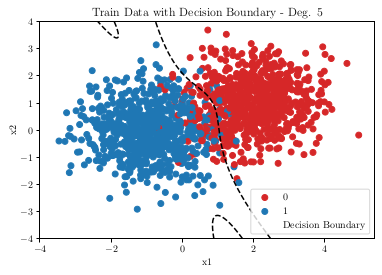

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
fig, ax = plt.subplots()

matplotlib.use("pgf")  # For storing graph into pgf for latex.
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

df_train = pd.read_csv("../hw2_train.csv")
colors = ['tab:red' if tmp == 0 else 'tab:blue' for tmp in df_train.y]  # Set colors according to it's lables.

plt.title("Train Data with Decision Boundary - Deg. 5")
plt.xlabel("x1")
plt.ylabel("x2")
plt.scatter(df_train.x1[0], df_train.x2[0], c="tab:red", label="0")  # Those two scatters are for legends.
plt.scatter(df_train.x1[1], df_train.x2[1], c="tab:blue", label="1")
plt.scatter(df_train.x1[1:], df_train.x2[1:], c=colors[1:])

y, x = np.ogrid[-4:4:1000j, -4:4:1000j]
cs = plt.contour(
    x.ravel(), y.ravel(), result[1] * (x ** 5) + result[2] * (x ** 4) * y + result[3] * (x ** 3) * (y ** 2) + result[4] * ((x ** 2) * (y ** 3)) + result[5] * (x * (y ** 4)) + result[6] * y ** 5, [-result[0]], colors="black")

cs.collections[0].set_label("Decision Boundary")

plt.legend()
plt.show()
plt.savefig('deg5-train.pgf')

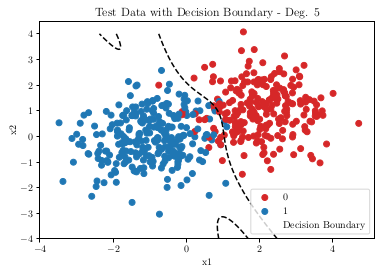

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
fig, ax = plt.subplots()

matplotlib.use("pgf")  # For storing graph into pgf for latex.
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})
df_train = pd.read_csv("../hw2_test.csv")
colors = ['tab:red' if tmp == 0 else 'tab:blue' for tmp in df_train.y]  # Set colors according to it's lables.

plt.title("Test Data with Decision Boundary - Deg. 5")
plt.xlabel("x1")
plt.ylabel("x2")
plt.scatter(df_train.x1[0], df_train.x2[0], c="tab:red", label="0")  # Those two scatters are for legends.
plt.scatter(df_train.x1[1], df_train.x2[1], c="tab:blue", label="1")
plt.scatter(df_train.x1[1:], df_train.x2[1:], c=colors[1:])

y, x = np.ogrid[-4:4:1000j, -4:4:1000j]
cs = plt.contour(
    x.ravel(), y.ravel(), result[1] * (x ** 5) + result[2] * (x ** 4) * y + result[3] * (x ** 3) * (y ** 2) + result[4] * ((x ** 2) * (y ** 3)) + result[5] * (x * (y ** 4)) + result[6] * y ** 5, [-result[0]], colors="black")

cs.collections[0].set_label("Decision Boundary")

plt.legend()
plt.show()
plt.savefig('deg5-test.pgf')